In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [8]:
model = KNeighborsClassifier(n_neighbors = 12)

In [9]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.94

## Plotting Elbow curve 

In [12]:
error = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error.append(1-accuracy_score(y_test,y_pred))

In [13]:
error


[0.08666666666666667,
 0.07666666666666666,
 0.06999999999999995,
 0.07333333333333336,
 0.06999999999999995,
 0.06999999999999995,
 0.06333333333333335,
 0.06333333333333335,
 0.07999999999999996,
 0.06666666666666665,
 0.06666666666666665,
 0.06000000000000005,
 0.06000000000000005,
 0.06666666666666665,
 0.06000000000000005,
 0.06000000000000005,
 0.06333333333333335,
 0.06000000000000005,
 0.05666666666666664]

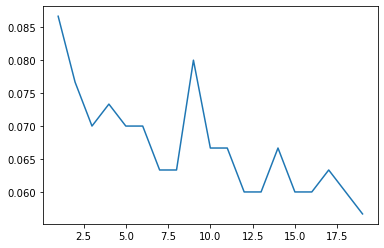

In [14]:
plt.plot(range(1,20),error)

## Stratified K-Fold CV

In [15]:
stf = StratifiedKFold(n_splits=10)

In [16]:
stf.get_n_splits(X=X, y=y)

10

In [17]:
KNN = KNeighborsClassifier()

In [18]:
accuracy = []
for train_index, test_index in stf.split(X,y):
    #Print('Train', 'train_index', 'Test = test_index')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #Fetching
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

In [19]:
np.mean(accuracy)

0.93

## Hyperparameter Tuning using GridSearchCV

In [45]:
param = {'n_neighbors': [10,20,30,40,50,80,151], 'weights': ['uniform'], 'algorithm': ['brute', 'ball_tree']}

In [46]:
gcv = GridSearchCV(estimator=KNN, param_grid=param, cv=10)

In [47]:
gcv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=40),
             param_grid={'algorithm': ['brute', 'ball_tree'],
                         'n_neighbors': [10, 20, 30, 40, 50, 80, 151],
                         'weights': ['uniform']})

In [48]:
gcv.best_params_

{'algorithm': 'brute', 'n_neighbors': 40, 'weights': 'uniform'}

In [39]:
KNN = KNeighborsClassifier(n_neighbors= 40, weights='uniform', algorithm = 'auto')

In [40]:
accuracy = []
for train_index, test_index in stf.split(X,y):
    #Print('Train', 'train_index', 'Test = test_index')
    X_train, X_test, = X.iloc[train_index], X.iloc[test_index] #Fetching
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [49]:
np.mean(accuracy)

0.9410000000000002

In [5]:
stf = StratiFiedKfold

NameError: name 'StratiFiedKfold' is not defined

In [3]:
stf = StratifiedKfold(n_splits=10, shuffle=true, random_state=1)

NameError: name 'StratifiedKfold' is not defined

In [ ]:
cross_val_score(estimator=RadomForestClassifier(), cv=stf,scoring='accuracy')